In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
day_0 = pd.read_csv("prices_round_3_day_0.csv",sep=";")
day_1 = pd.read_csv("prices_round_3_day_1.csv",sep=";")
day_2 = pd.read_csv("prices_round_3_day_2.csv",sep=";")

all_days=pd.concat([day_0,day_1,day_2], ignore_index=True)
print(day_0.shape)
print(all_days.shape)

(40000, 17)
(120000, 17)


In [16]:
roses = all_days[all_days['product'] == "ROSES"].reset_index()
strawberries = all_days[all_days['product'] == "STRAWBERRIES"].reset_index()
print(chocolate.head())

   index  day  timestamp    product  bid_price_1  bid_volume_1  bid_price_2  \
0      0    0          0  CHOCOLATE         7999           111          NaN   
1      5    0        100  CHOCOLATE         8001            52       8000.0   
2     10    0        200  CHOCOLATE         8000           152          NaN   
3     15    0        300  CHOCOLATE         8002            44       8001.0   
4     16    0        400  CHOCOLATE         8001           118          NaN   

   bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0           NaN          NaN           NaN         8001           111   
1          95.0          NaN           NaN         8002           147   
2           NaN          NaN           NaN         8002           152   
3          84.0          NaN           NaN         8003           128   
4           NaN          NaN           NaN         8003           118   

   ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0          NaN  

In [20]:
print(roses['mid_price'].corr(strawberries['mid_price']))

0.14866686244606558


In [21]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [22]:
coint(roses['mid_price'],strawberries['mid_price'])

(-3.229563670260314,
 0.06512135740837934,
 array([-3.89680511, -3.33633368, -3.04459138]))

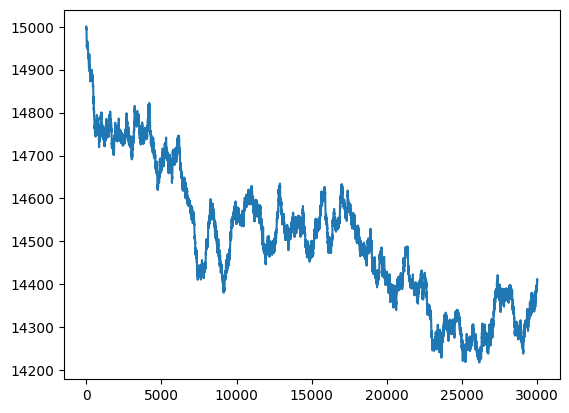

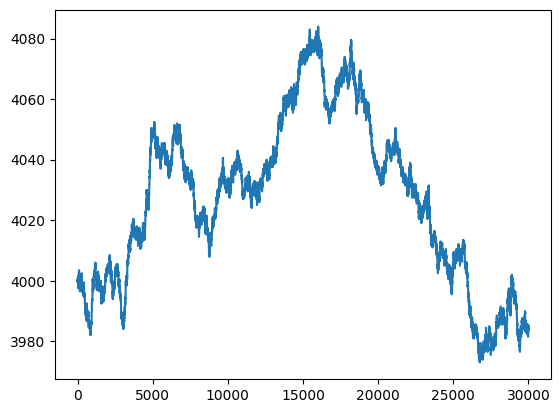

In [23]:
plt.plot(roses['mid_price'])
plt.show()
plt.plot(strawberries['mid_price'])
plt.show()

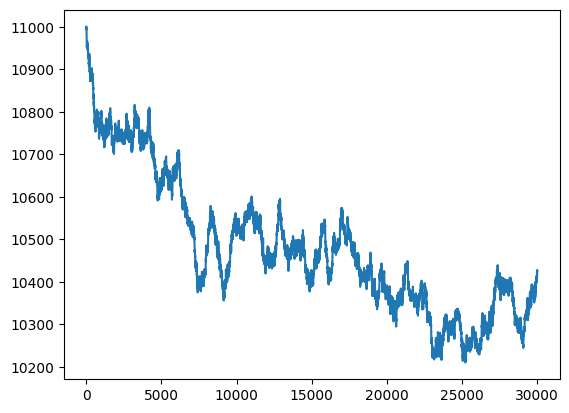

In [25]:
# trade off of roses and strawberry spread
spread = roses['mid_price'] - strawberries['mid_price']

plt.plot(spread)

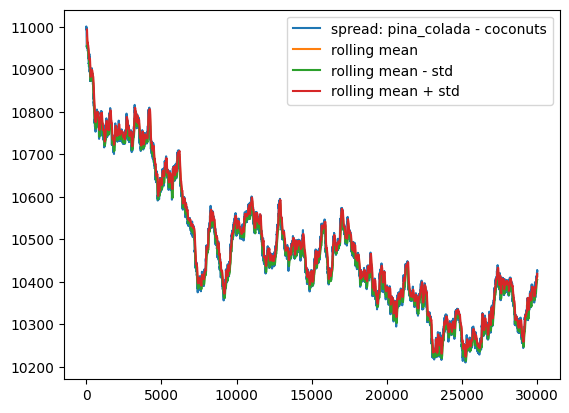

In [26]:
window = 50
spread.plot(label = "spread: pina_colada - coconuts")

avg_rolling_spread = spread.rolling(window)\
    .mean()

mov_spread5 = spread

rolling_std_spread = spread.rolling(window)\
    .std()

avg_rolling_spread.plot(label = "rolling mean")
(avg_rolling_spread - rolling_std_spread).plot(label = "rolling mean - std")
(avg_rolling_spread + rolling_std_spread).plot(label = "rolling mean + std")

plt.legend()

<Axes: >

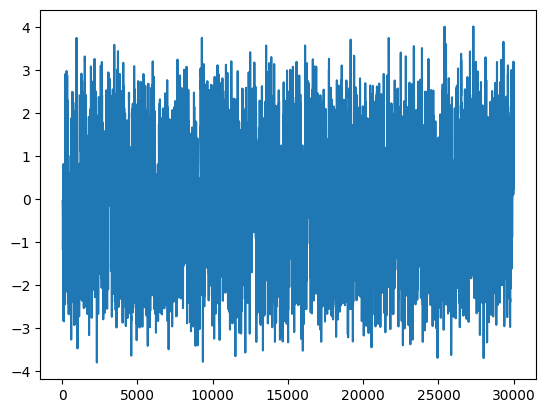

In [34]:
((spread - avg_rolling_spread)/rolling_std_spread)\
    .plot()

In [35]:
buy = (mov_spread5 - avg_rolling_spread)/rolling_std_spread < -2.5
sell = (mov_spread5 - avg_rolling_spread)/rolling_std_spread > 2.5

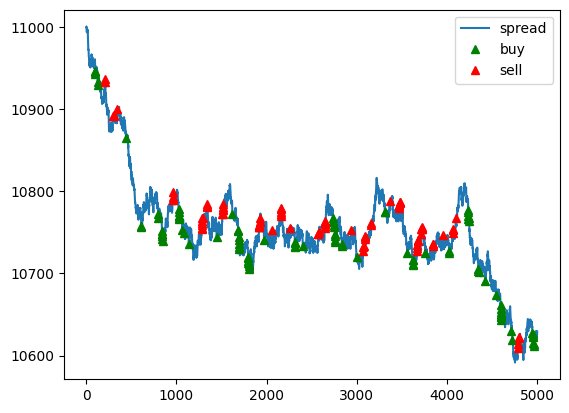

In [37]:
spread_plot = spread[:5000]

spread_plot.plot(label = 'spread')
spread_plot[buy].plot(
    marker ='^', 
    color ='green', 
    linestyle= 'None',
    label = 'buy'
)
spread_plot[sell].plot(
    marker= '^', 
    color = 'red', 
    linestyle= 'None',
    label = 'sell'
)

plt.legend()
plt.show()